#**Project Name: UNEMPLOYMENT ANALYSIS WITH PYTHON**

##Author Name: Ganesh Arjun Patewar

## Method Used: Exploratory Data Analysis Using Python.

##Github link:

##Project description: 
####This data science project focuses on analyzing the unemployment rate, which measures the percentage of people who are unemployed within the total labor force. The project specifically examines the significant increase in unemployment during the Covid-19 pandemic. By studying historical data, identifying trends in different demographics and regions, and using statistical analysis and visualization techniques, the project aims to understand the factors behind these fluctuations. The insights gained from this analysis can help inform policymakers, economists, and researchers in making informed decisions and developing effective interventions.

Bagging.avif

##Importing libraries:

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing dataset:

In [48]:
df=pd.read_csv('/content/drive/MyDrive/DATA SCIENCE/Python All/csv/Unemployment in India.csv')

##Firstlook of Data:

In [49]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [50]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.shape

(768, 7)

##Data info:

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


##Data describe:

In [53]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


##Null values handling:

In [54]:
# Count of total null values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [55]:
#Dropping null values
df.dropna(inplace=True)

In [56]:
#Rechecking count of null values after dropping
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

##Checking duplicates:

In [57]:
df.duplicated().sum()

0

###Changing the datatype of Date column.

In [58]:
df[" Date"] =  pd.to_datetime(df[" Date"])
print(df.dtypes)

Region                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
dtype: object


###Renaming some colmns:

In [59]:
#Some columns consist extra spaces in title that we are removing
df.rename(columns= {' Date':'Date',' Frequency':'Frequency',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                    ' Estimated Employed':'Estimated Employed',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

##New data info 

In [60]:
#New data info after renaming some columns and null values and duplicate value handling.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


##Unique values from every columns:

In [61]:
pd.Series({col: df[col].unique() for col in df})

Region                                     [Andhra Pradesh, Assam, Bihar, Chhattisgarh, D...
Date                                       [2019-05-31T00:00:00.000000000, 2019-06-30T00:...
Frequency                                                                [ Monthly, Monthly]
Estimated Unemployment Rate (%)            [3.65, 3.05, 3.75, 3.32, 5.17, 3.52, 4.12, 4.3...
Estimated Employed                         [11999139.0, 11755881.0, 12086707.0, 12285693....
Estimated Labour Participation Rate (%)    [43.24, 42.05, 43.5, 43.97, 44.68, 43.01, 41.0...
Area                                                                          [Rural, Urban]
dtype: object

In [62]:
print(df['Date'].min())
print(df['Date'].max())

2019-05-31 00:00:00
2020-06-30 00:00:00


##Adding New columns:

In [63]:
#Introducing new column Year by extracting Year from Date column
df['Year']=df['Date'].dt.year
df['Year']

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
749    2020
750    2020
751    2020
752    2020
753    2020
Name: Year, Length: 740, dtype: int64

In [64]:
#Introducing new column Month by extracting Month from Date column

df['Month']=df['Date'].dt.month
df['Month'].head()

0    5
1    6
2    7
3    8
4    9
Name: Month, dtype: int64

##New look of Dataframe after new columns:

In [65]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9


#Data Visualization and Storytelling:

###Plot 1: Year Vs Estimated Unemployment Rate 

For ease in understanding and calculation I am dividing the dataframe in 2 parts based on year. All datapoints of 2019 are considered as 'Pre-Covid Period' and 2020 datapoints are 'Covid Period'.

In [66]:
a=df.groupby('Year',as_index=False)['Estimated Unemployment Rate (%)'].mean()
a

,Year,Estimated Unemployment Rate (%)
0,2019,9.399047
1,2020,15.101581


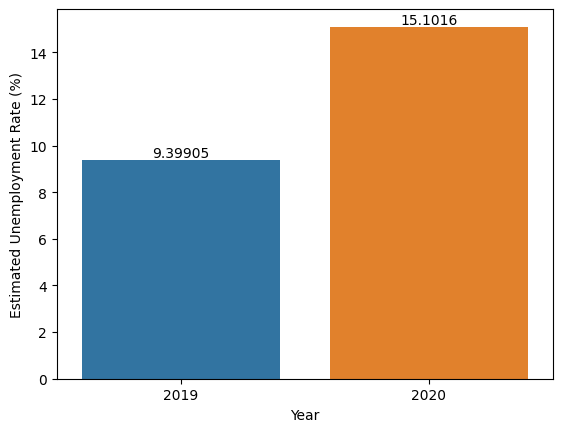

In [67]:
ax=sns.barplot(x=a['Year'],y=a['Estimated Unemployment Rate (%)'])

for i in ax.containers:
  ax.bar_label(i)

####From the bar plot above, it is evident that the estimated unemployment rate (%) experienced a significant and drastic increase in 2020. In fact, it increased by approximately 60% compared to previous years.

###Plot 2: Year and Month Vs Estimated Unemployment Rate 

In [68]:
b=df.groupby(['Year','Month'],as_index=False)['Estimated Unemployment Rate (%)'].mean()
b.head(2)

,Year,Month,Estimated Unemployment Rate (%)
0,2019,5,8.874259
1,2019,6,9.303333


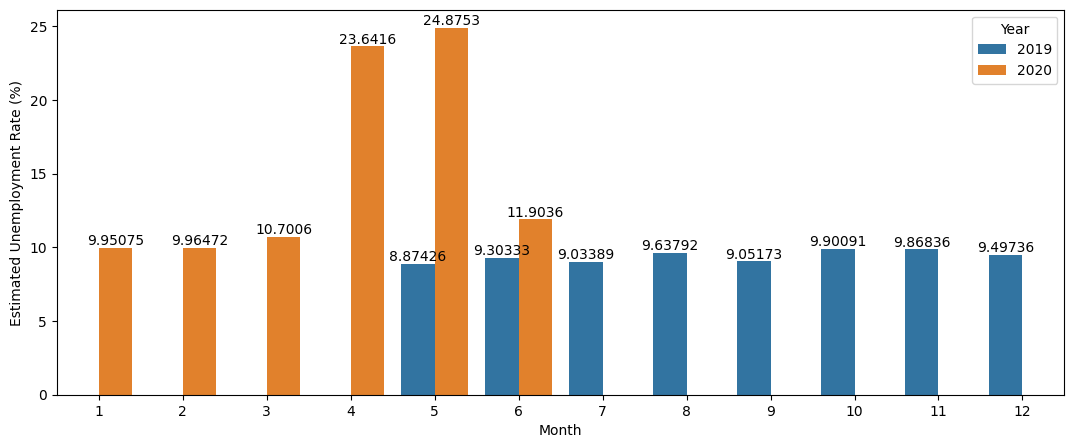

In [69]:
plt.figure(figsize=(13,5))
bx=sns.barplot(x=b['Month'],y=b['Estimated Unemployment Rate (%)'],hue=b['Year'])

for i in bx.containers:
  bx.bar_label(i)

####From the bar plot above, it is evident that the estimated unemployment rate (%) experienced an increase in 2020. Specifically, the months of March, April, May, and June of 2020 exhibit higher estimated unemployment rates (%) compared to the average.

###Plot 3: Region Vs Estimated Unemployment Rate 

In [70]:
d=df.groupby('Region',as_index=False)['Estimated Unemployment Rate (%)'].mean()
d.head(2)

,Region,Estimated Unemployment Rate (%)
0,Andhra Pradesh,7.477143
1,Assam,6.428077


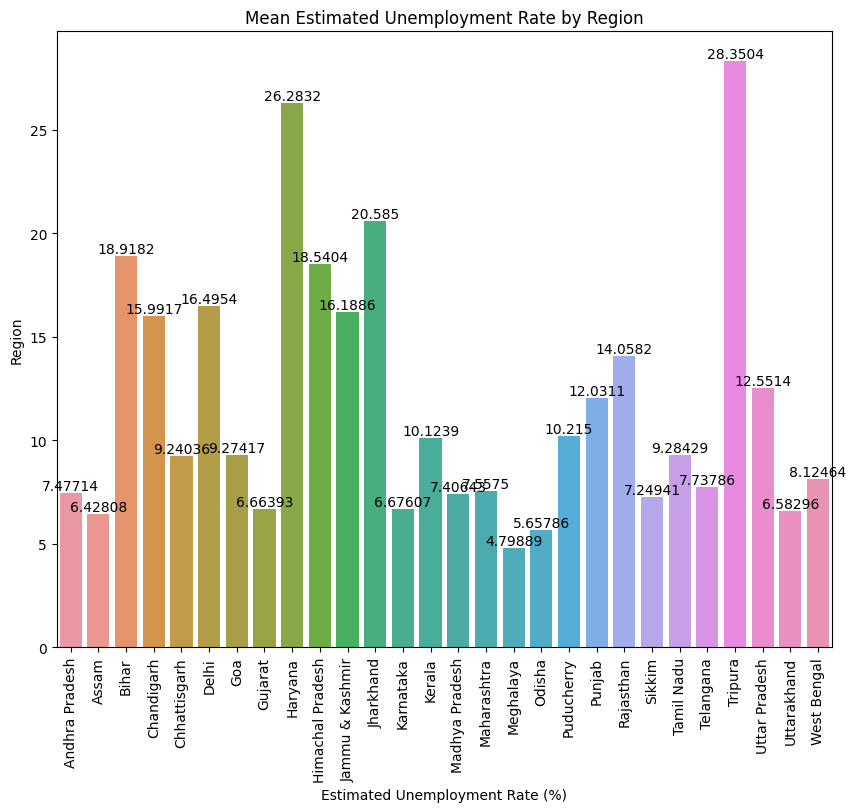

In [71]:
d = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(10, 8))
dx=sns.barplot(y='Estimated Unemployment Rate (%)', x='Region', data=d)

for i in dx.containers:
  dx.bar_label(i)

plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Region')
plt.title('Mean Estimated Unemployment Rate by Region')

plt.xticks(rotation=90)   #For making name of region vertical
plt.show()

####The top 3 states with highest mean Estimated Unemployment Rate (%) are:

1.Tripura

2.Haryana

3.Jharkhand

####The last 3 states in mean Estimated Unemployment Rate (%) are:
1.Meghalaya

2.Odisha

3.Assam



###Plot 4: Estimated Unemployment Rate in peak months of 2020.

In [72]:
df_peak = df[(df['Month'].isin([3, 4, 5])) & (df['Year']==2020)]
df_peak.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
10,Andhra Pradesh,2020-03-31,Monthly,4.06,11359660.0,40.66,Rural,2020,3
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural,2020,4
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural,2020,5
23,Assam,2020-03-31,Monthly,3.77,9878742.0,47.05,Rural,2020,3
24,Assam,2020-05-31,Monthly,9.38,9926176.0,50.00,Rural,2020,5


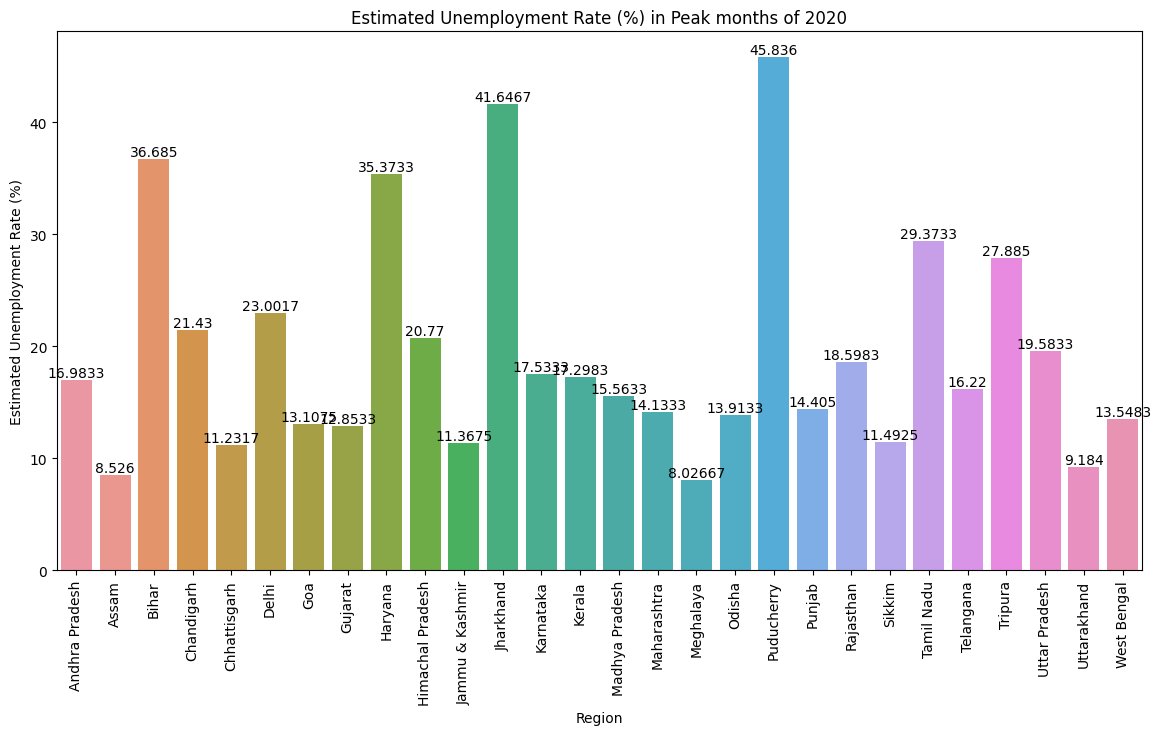

In [98]:
plt.figure(figsize=(14,7))
t=df_peak.groupby('Region',as_index=False)['Estimated Unemployment Rate (%)'].mean()

tx=sns.barplot(x=t['Region'],y=t['Estimated Unemployment Rate (%)'])

for i in tx.containers:
  tx.bar_label(i)

plt.xticks(rotation=90)
plt.title('Estimated Unemployment Rate (%) in Peak months of 2020')
plt.show()

####From the above plot, it is apparent that during the peak months of 2020, the state with the highest estimated unemployment rate (%) was 'Puducherry', while 'Meghalaya' had the lowest estimated unemployment rate (%).

###Plot 5: Region Vs Year Vs Estimated Unemployment Rate 

In [74]:
c=df.groupby(['Region','Year'],as_index=False)['Estimated Unemployment Rate (%)'].mean()
c

,Region,Year,Estimated Unemployment Rate (%)
0,Andhra Pradesh,2019,4.826875
1,Andhra Pradesh,2020,11.010833
2,Assam,2019,6.420667
3,Assam,2020,6.438182
4,Bihar,2019,13.882500
5,Bihar,2020,25.632500
6,Chandigarh,2019,15.822500
7,Chandigarh,2020,16.330000
8,Chhattisgarh,2019,7.346875
9,Chhattisgarh,2020,11.765000


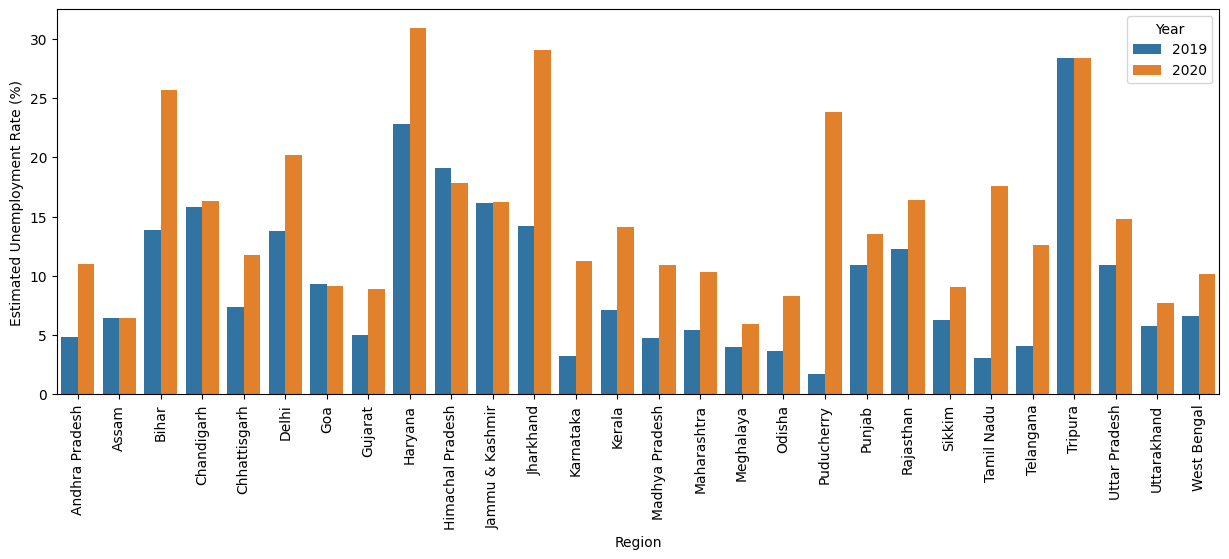

In [119]:
plt.figure(figsize=(15,5))
cx=sns.barplot(x=c['Region'],y=c['Estimated Unemployment Rate (%)'],hue=c['Year'])

plt.xticks(rotation=90)
plt.show()

####The above graph illustrates that Haryana had the highest estimated unemployment rate in 2020, while Assam had the lowest. In contrast, Tripura had the highest estimated unemployment rate in 2019, whereas Odisha had the lowest.

####Additionally, it is noteworthy that Tripura had the same highest estimated unemployment rate in both 2019 and 2020.

####It is evident that the estimated unemployment rate in 2020 was higher than in 2019 for all states/union territories.

###Plot 6: Area Vs Estimated Unemployment Rate 

In [76]:
f=df.groupby('Area',as_index=False)['Estimated Unemployment Rate (%)'].mean()
f

,Area,Estimated Unemployment Rate (%)
0,Rural,10.324791
1,Urban,13.166614


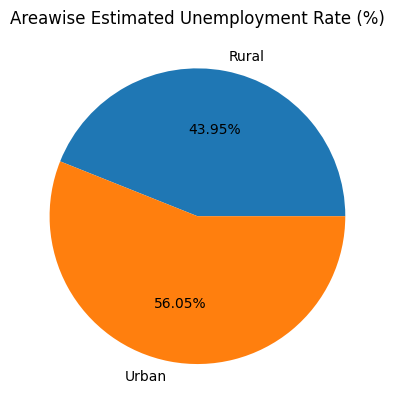

In [77]:
plt.pie(f['Estimated Unemployment Rate (%)'],labels=f['Area'],autopct='%0.2f%%')

plt.title('Areawise Estimated Unemployment Rate (%)')
plt.show()

####Estimated Unemployment Rate is more in Urban area than Rural area.

###Plot 7: Region vs Area Vs Estimated Unemployment Rate 

In [78]:
e=df.groupby(['Region','Area'],as_index=False)['Estimated Unemployment Rate (%)'].mean()
e.head(6)

,Region,Area,Estimated Unemployment Rate (%)
0,Andhra Pradesh,Rural,5.526429
1,Andhra Pradesh,Urban,9.427857
2,Assam,Rural,4.490833
3,Assam,Urban,8.088571
4,Bihar,Rural,16.770000
5,Bihar,Urban,21.066429


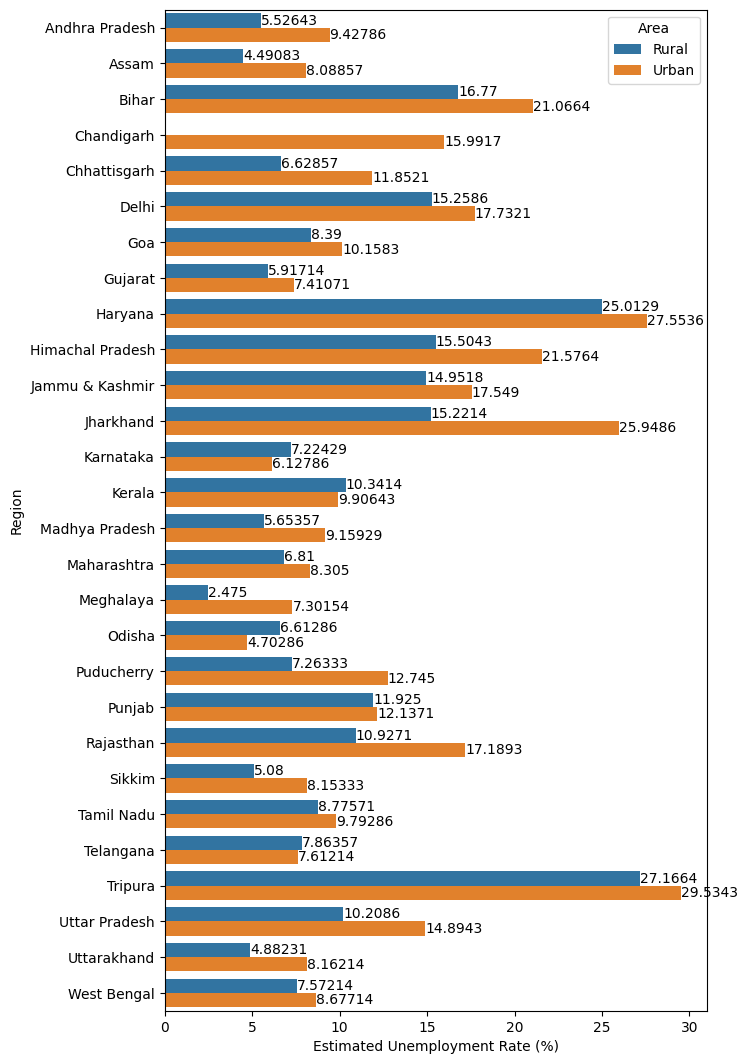

In [79]:
plt.figure(figsize=(7,13))
ex=sns.barplot(y=e['Region'],x=e['Estimated Unemployment Rate (%)'],hue=e['Area'])

for i in ex.containers:
  ex.bar_label(i)

####The prevailing trend suggests that the estimated unemployment rate tends to be higher in urban areas compared to rural areas. However, it is worth noting that in the states of 'Karnataka', 'Telangana', 'Kerala', and 'Odisha', the estimated unemployment rate in urban areas is lower than in rural areas.

###Plot 8: Difference in Estimated Unemployment Rate of 2019 and 2020

In [80]:
#Creating new dataframe where year=2019
df19=df[df['Year']==2019]
df19.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6


In [81]:
# Creating new dataframe where year=2020
df20=df[df['Year']==2020]
df20.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Month
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural,2020,1
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural,2020,2


In [82]:
# grouping dataframe on Region column to get mean Estimated Unemployment Rate (%)
g=df19.groupby('Region',as_index=False)['Estimated Unemployment Rate (%)'].mean()
g.head(2)

,Region,Estimated Unemployment Rate (%)
0,Andhra Pradesh,4.826875
1,Assam,6.420667


In [83]:
eur19=g['Estimated Unemployment Rate (%)']
eur19.head(2)

0    4.826875
1    6.420667
Name: Estimated Unemployment Rate (%), dtype: float64

In [84]:
# grouping dataframe on Region column to get mean Estimated Unemployment Rate (%)
h=df20.groupby('Region',as_index=False)['Estimated Unemployment Rate (%)'].mean()
h.head(2)

,Region,Estimated Unemployment Rate (%)
0,Andhra Pradesh,11.010833
1,Assam,6.438182


In [85]:
Region=h['Region']  #Taking Region column separately

In [86]:
eur20=h['Estimated Unemployment Rate (%)']
eur20.head(2)

0    11.010833
1     6.438182
Name: Estimated Unemployment Rate (%), dtype: float64

In [87]:
# Creating new data frame by zipping 3 columns
eur=pd.DataFrame(zip(Region,eur19,eur20),columns=['Region','2019','2020'])
eur

,Region,2019,2020
0,Andhra Pradesh,4.826875,11.010833
1,Assam,6.420667,6.438182
2,Bihar,13.882500,25.632500
3,Chandigarh,15.822500,16.330000
4,Chhattisgarh,7.346875,11.765000
5,Delhi,13.750625,20.155000
6,Goa,9.346250,9.130000
7,Gujarat,4.979375,8.910000
8,Haryana,22.798750,30.929167
9,Himachal Pradesh,19.064375,17.841667


In [88]:
# Creating new column by taking difference between Unemployment Rate of 2019 and 2020
eur['Diff_eur']=eur['2019']-eur['2020']

In [89]:
eur=eur.sort_values('Diff_eur')

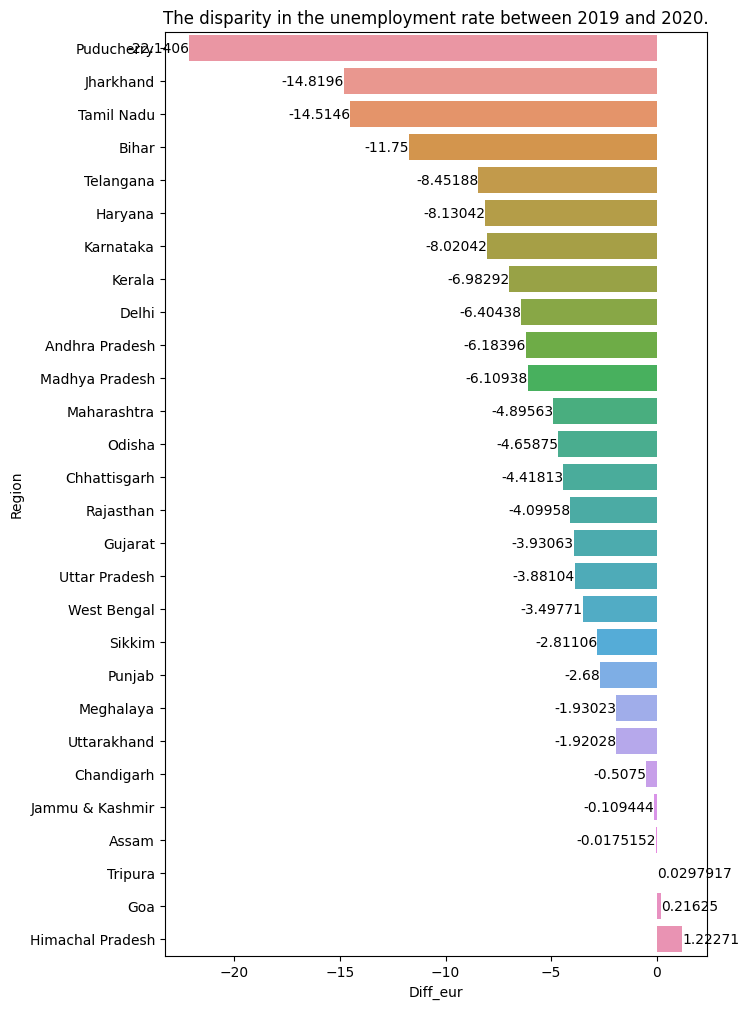

In [90]:
plt.figure(figsize=(7,12))
vx=sns.barplot(y=eur['Region'],x=eur['Diff_eur'])

plt.title('The disparity in the unemployment rate between 2019 and 2020.')

for i in vx.containers:
  vx.bar_label(i)

####The largest disparity in the estimated unemployment rate is observed in 'Puducherry', while the smallest disparity is found in 'Himachal Pradesh'.

####Among the states, namely 'Tripura', 'Goa', and 'Himachal Pradesh', there was no decrease in the estimated unemployment rate for the year 2020 compared to 2019. However, all other states and union territories experienced an increase in the estimated unemployment rate in 2020.

###Plot 9: Plot for Region  vs Estimated Unemployment Ratio (%)

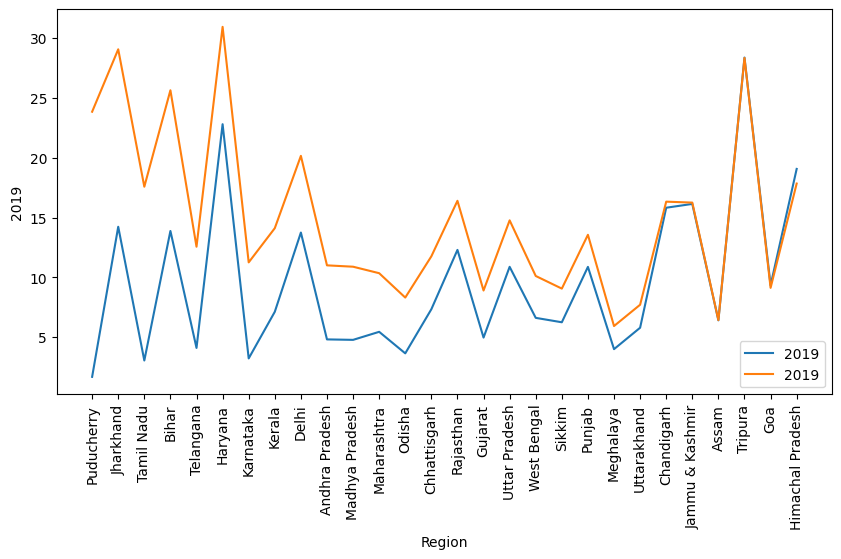

In [118]:
plt.figure(figsize=(10,5))
sns.lineplot(x=eur['Region'],y=eur['2019'],label='2019')
sns.lineplot(x=eur['Region'],y=eur['2020'],label='2019')

plt.legend()
plt.xticks(rotation=90)
plt.show()

####The graph clearly indicates a noticeable gap between the lines representing the estimated unemployment rate in 2019 and 2020.

###Plot 10: Lineplot for Estimated Unemployment Rate

<Axes: xlabel='Date', ylabel='Estimated Unemployment Rate (%)'>

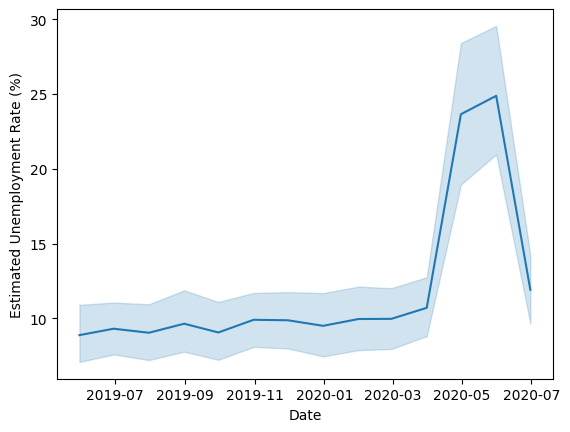

In [92]:
sns.lineplot(x=df['Date'],y=df['Estimated Unemployment Rate (%)'])

####This line plot depicts a distinct surge in the estimated unemployment rate starting in March 2020, reaching its peak in May 2020. However, after that peak, the graph gradually returns to normal levels.

#Conclusions:

###1.The estimated unemployment rate (%) saw a significant and drastic increase of approximately 60% in 2020 compared to previous years.

###2.The months of March, April, May, and June of 2020 exhibited higher estimated unemployment rates (%) compared to the average.

###3.The top three states with the highest mean estimated unemployment rate (%) are Tripura, Haryana, and Jharkhand, while the bottom three states in terms of mean estimated unemployment rate (%) are Meghalaya, Odisha, and Assam.

###4.During the peak months of 2020, Puducherry had the highest estimated unemployment rate (%), while Meghalaya had the lowest.

###5.Haryana had the highest estimated unemployment rate in 2020, while Assam had the lowest. Tripura had the highest estimated unemployment rate in 2019, and Odisha had the lowest.

###6.Tripura had the same highest estimated unemployment rate in both 2019 and 2020.

###7.The estimated unemployment rate was generally higher in urban areas compared to rural areas, but in the states of Karnataka, Telangana, Kerala, and Odisha, the estimated unemployment rate in urban areas was lower than in rural areas.

###8.Puducherry had the largest disparity in estimated unemployment rate, while Himachal Pradesh had the smallest disparity.

###9.Only Tripura, Goa, and Himachal Pradesh did not experience a decrease in estimated unemployment rate in 2020 compared to 2019, while all other states and union territories saw an increase.

###10.There is a noticeable gap between the lines representing the estimated unemployment rate in 2019 and 2020.

###11.The line plot indicates a distinct surge in the estimated unemployment rate starting in March 2020, peaking in May 2020, and gradually returning to normal levels thereafter.